# Clustering of IOT devices
Project topic ish: IoT Device Grouping in 5G Networks Using ML methods for Enhanced Resource Management

[Link to dataset](https://www.kaggle.com/datasets/suraj520/cellular-network-analysis-dataset)

This dataset, provides realistic signal metrics for 3G, 4G, 5G, and LTE network analysis using DragonOS, Spike, and SDR devices. The dataset aims to provide a representative sample of signal measurements for various network types and locations in Bihar, India. The dataset also replicates the hardware setup involving the Spike software, DragonOS running on the Valve Steam Deck gaming system, BB60C spectrum analyzer powered by an external USB3 hub connected to the Steam Deck's USB C port, srsRan running on a separate laptop for creating the base station using the bladeRFxA9 device.

In [1]:
import pandas as pd

df_raw = pd.read_csv("/home/eirik/data/signal_metrics.csv")

In [2]:
df_raw["Network Type"] = df_raw["Network Type"].map({"3G": 0, "4G": 1, "5G": 2, "LTE": 3})

area = "Fraser Road"
df_pruned = df_raw[df_raw["Locality"] == area].reset_index(drop=True).reset_index(drop=False)

df_pruned = df_pruned.rename(columns={'index': 'node'})

features = ["Latitude", 
            "Longitude", 
            "Network Type", 
            "Signal Strength (dBm)", 
            "Data Throughput (Mbps)"]

df_pruned = df_pruned[features]

print(df_pruned.columns)

Index(['Latitude', 'Longitude', 'Network Type', 'Signal Strength (dBm)',
       'Data Throughput (Mbps)'],
      dtype='object')


In [3]:
numerical_columns = ["Latitude", "Longitude", "Signal Strength (dBm)", "Data Throughput (Mbps)"]

traindata = df_pruned.copy()
traindata[numerical_columns] = traindata[numerical_columns].apply(lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1)

traindata["Latitude"] *= 10
traindata["Longitude"] *= 10

traindata.columns

traindata = traindata.to_numpy()

print(traindata.shape)

(897, 5)


[[ 3.02956628  4.94374966  1.36789298  0.13611845 -0.70380735]
 [ 2.6817971  -4.77987648  1.47118644  0.12405734 -0.6878283 ]
 [-5.82510979 -0.46717949  1.53135314  0.1243954  -0.67637435]]


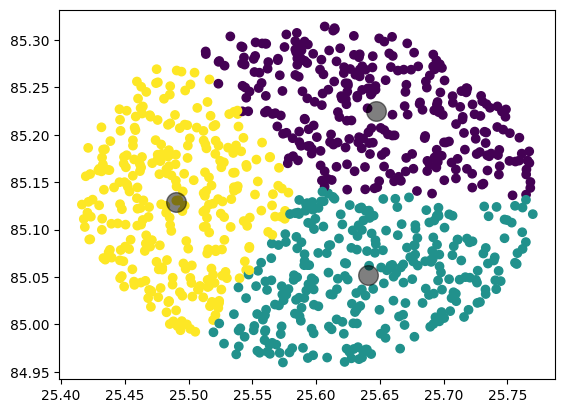

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=0).fit(traindata)
labels = kmeans.predict(traindata)

print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_[:, 0:2]

centroids /= 10
centroids[:, 0] = (centroids[:, 0] + 1) / 2 * (df_pruned["Latitude"].max() - df_pruned["Latitude"].min()) + df_pruned["Latitude"].min()
centroids[:, 1] = (centroids[:, 1] + 1) / 2 * (df_pruned["Longitude"].max() - df_pruned["Longitude"].min()) + df_pruned["Longitude"].min()

latitudes = df_pruned[["Latitude"]].values
longitudes = df_pruned[["Longitude"]].values

plt.scatter(latitudes, longitudes, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)

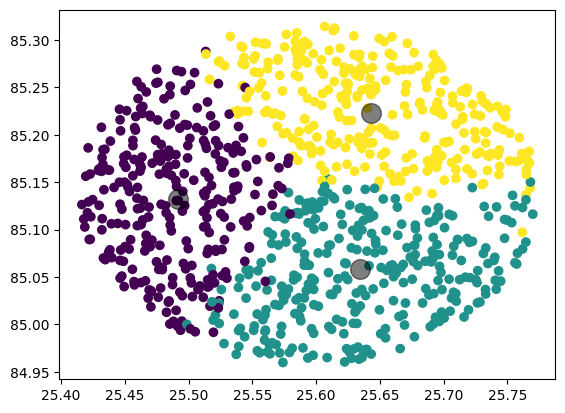

In [55]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42).fit(traindata)
labels = gm.predict(traindata)

means = gm.means_[:, 0:2]

means /= 10
means[:, 0] = (means[:, 0] + 1) / 2 * (df_pruned["Latitude"].max() - df_pruned["Latitude"].min()) + df_pruned["Latitude"].min()
means[:, 1] = (means[:, 1] + 1) / 2 * (df_pruned["Longitude"].max() - df_pruned["Longitude"].min()) + df_pruned["Longitude"].min()

latitudes = df_pruned[["Latitude"]].values
longitudes = df_pruned[["Longitude"]].values

plt.scatter(latitudes, longitudes, c=labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], c='black', s=200, alpha=0.5)